In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/Financial_Fraud_Detection.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Data Definitions

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (31 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [68]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
df.select_dtypes(include = ['object']).head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


Exploratory Data Analysis (EDA)

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
df.groupby('isFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407
1,8213,8213,8213,8213,8213,8213,8213,8213,8213,8213


In [11]:
df.groupby('isFraud')['isFraud'].count()

isFraud
0    6354407
1       8213
Name: isFraud, dtype: int64

Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point

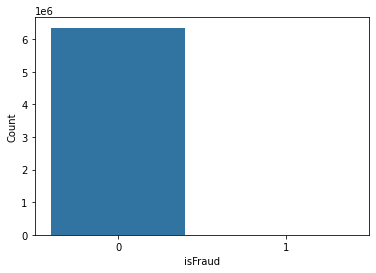

In [12]:
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


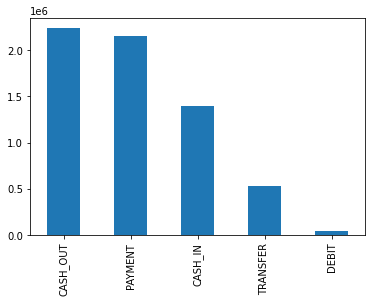

In [13]:
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [14]:
(df.groupby('isFraud')['isFraud'].count()/df['isFraud'].count()) *100

isFraud
0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [15]:
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [16]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [17]:
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

<ipython-input-17-020c5e3e01cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('type')['isFraud','isFlaggedFraud'].sum()


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


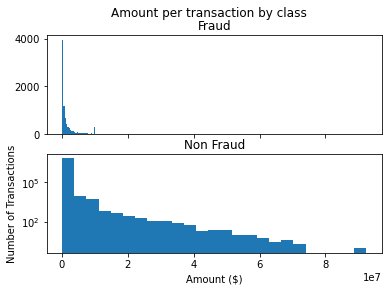

In [18]:
# Amount Vs number of transaction
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Less number of transaction amount in fraud comapare to non fraud data

In [19]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [20]:
print('Minimum amount flagged as fraud -', df[df['isFlaggedFraud']==1].amount.min())
print('Maximum amount flagged as fraud -', df[df['isFlaggedFraud']==1].amount.max())

Minimum amount flagged as fraud - 353874.22
Maximum amount flagged as fraud - 10000000.0


In [21]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

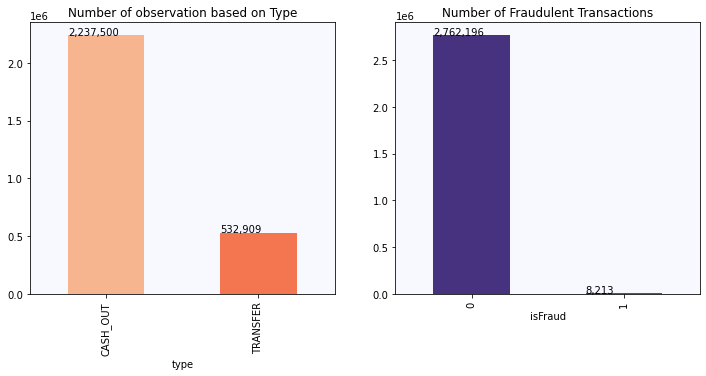

In [22]:
fig = plt.figure(figsize= (12,5))
fig.add_subplot(121)
ax = X.groupby('type').size().plot(kind ='bar', color=sns.color_palette('rocket_r'))
plt.title('Number of observation based on Type')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
ax.set_facecolor("ghostwhite")

fig.add_subplot(122)
bx = X['isFraud'].value_counts().plot(kind ='bar', color=sns.color_palette('viridis'))
plt.title('Number of Fraudulent Transactions')
plt.xlabel('isFraud')
for p in bx.patches:
    bx.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
bx.set_facecolor("ghostwhite")

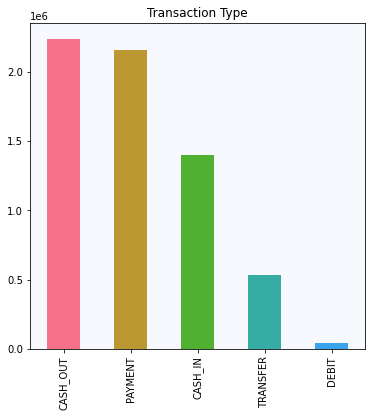

In [23]:
ax = df['type'].value_counts().plot( kind ='bar', title = 'Transaction Type', figsize= (6,6), color=sns.color_palette('husl'))
ax.set_facecolor("ghostwhite")

Text(0, 0.5, 'Count of transaction')

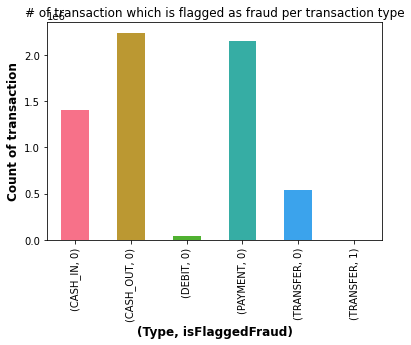

In [24]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')


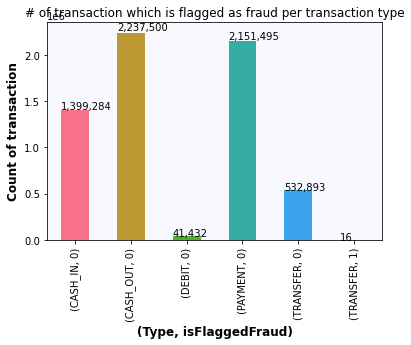

In [25]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
ax.set_facecolor("ghostwhite")

Text(0, 0.5, 'Count of transaction')

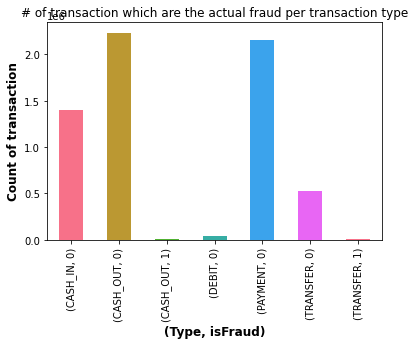

In [26]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')

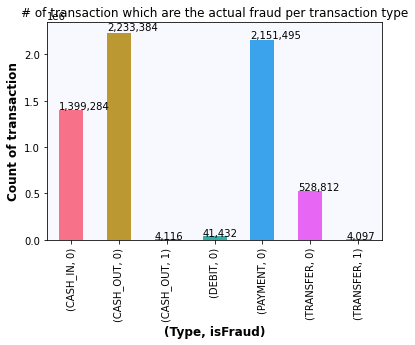

In [27]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
ax.set_facecolor("ghostwhite")

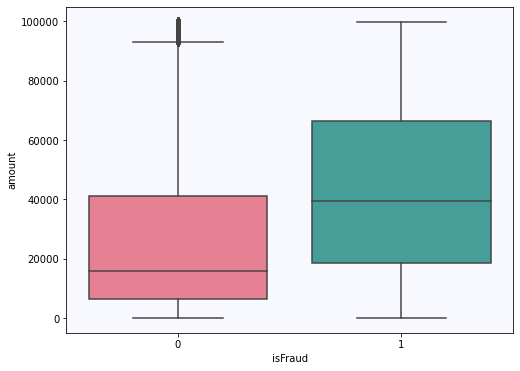

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'isFraud', y = 'amount', palette=("husl"), data = df[df.amount < 1e5]).set_facecolor("ghostwhite")
plt.show()

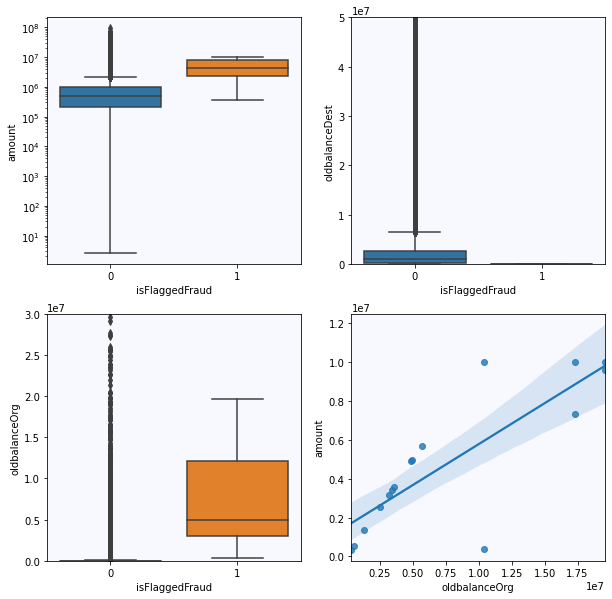

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0]).set_facecolor("ghostwhite")
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1]).set_facecolor("ghostwhite")
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0]).set_facecolor("ghostwhite")
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1]).set_facecolor("ghostwhite")
plt.show()

In [30]:
# Explore correlations to label
df.corr().isFlaggedFraud.sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
Name: isFlaggedFraud, dtype: float64

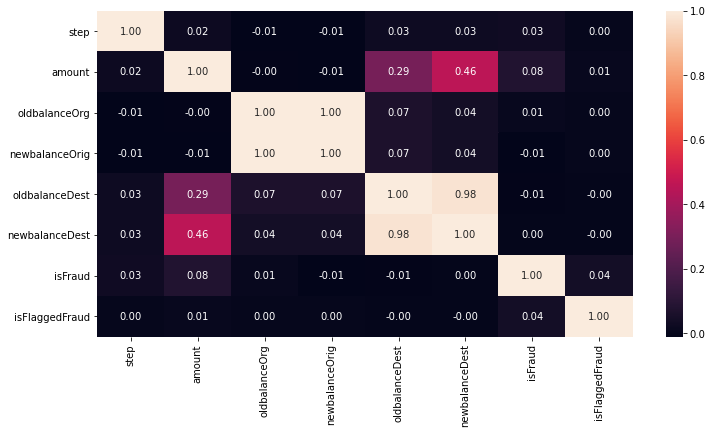

In [31]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [32]:
XFraud = X.loc[X.isFraud==1]
XNonFraud = X.loc[X.isFraud==0]

Text(0.5, 0, 'hour')

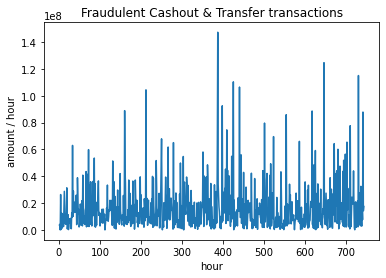

In [33]:
dfFraudPerHour = XFraud.groupby('step').sum()
plt.plot(dfFraudPerHour['amount'])
plt.ylabel('amount / hour')
plt.title('Fraudulent Cashout & Transfer transactions')
plt.xlabel('hour')

In [34]:
df['step_day'] = df['step'].map(lambda x: x//24) #744 step = 744 hours = 31 days/1 month transactions (31 days * 24 hours = 744). No of day = total hours (744) / No of hours per day (24)
df['hour'] = df['step_day'].map(lambda x: x%24)
df['step_week'] = df['step_day'].map(lambda x: x//7)

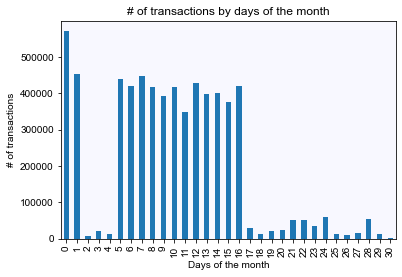

In [35]:
ax = df['step_day'].value_counts().sort_index(ascending=True).plot(kind = 'bar')
ax.set_xlabel("Days of the month")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by days of the month")
ax.set_facecolor("ghostwhite")
sns.set(style="whitegrid")

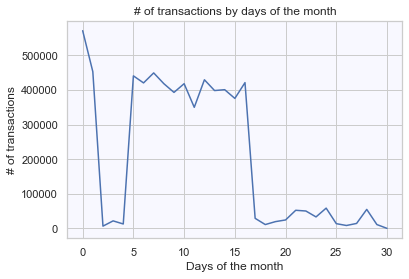

In [36]:
ax = df['step_day'].value_counts().sort_index(ascending=True).plot(kind = 'line')
ax.set_xlabel("Days of the month")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by days of the month")
ax.set_facecolor("ghostwhite")
sns.set(style="whitegrid")

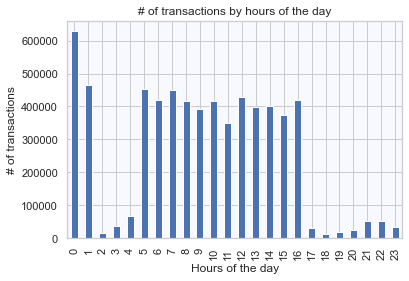

In [37]:
ax = df['hour'].value_counts().sort_index(ascending=True).plot(kind = 'bar')
ax.set_xlabel("Hours of the day")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by hours of the day")
ax.set_facecolor("ghostwhite")

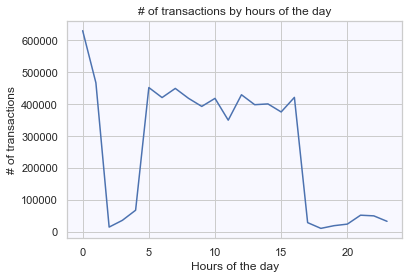

In [38]:
ax = df['hour'].value_counts().sort_index(ascending=True).plot(kind = 'line')
ax.set_xlabel("Hours of the day")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by hours of the day")
ax.set_facecolor("ghostwhite")

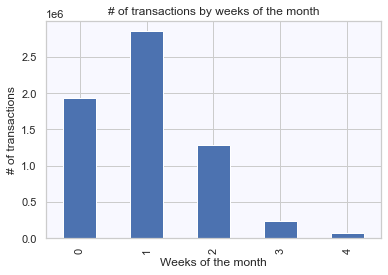

In [39]:
ax = df['step_week'].value_counts().sort_index(ascending=True).plot(kind ='bar')
ax.set_xlabel("Weeks of the month")
ax.set_ylabel("# of transactions")
ax.set_title("# of transactions by weeks of the month")
ax.set_facecolor("ghostwhite")

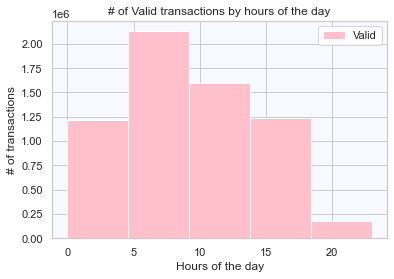

In [40]:
df[(df.isFraud == 0)]['hour'].plot.hist(bins=5,color='pink',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by hours of the day")
plt.legend()
plt.show()

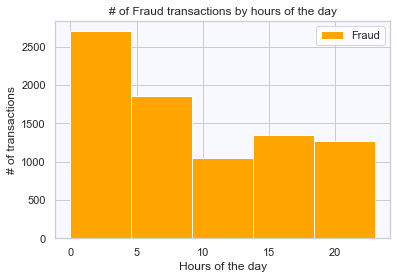

In [41]:
df[(df.isFraud == 1)]['hour'].plot.hist(bins=5,color='orange',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by hours of the day")
plt.legend()
plt.show()

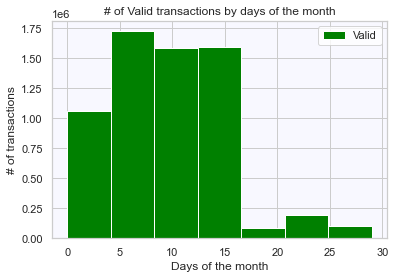

In [42]:
df[(df.isFraud == 0)]['step_day'].plot.hist(bins=7,color='green',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by days of the month")
plt.legend()
plt.show()

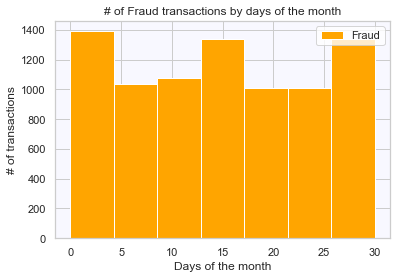

In [43]:
fig, ax = plt.subplots() #1,2, figsize=(7,9)
df[(df.isFraud == 1)]['step_day'].plot.hist(bins=7,color='orange',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by days of the month")
plt.legend()
plt.show()

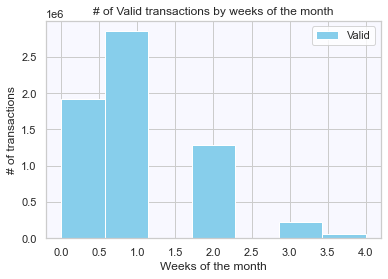

In [44]:
df[(df.isFraud == 0)]['step_week'].plot.hist(bins=7,color='skyblue',label='Valid').set_facecolor("ghostwhite")
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by weeks of the month")
plt.legend()
plt.show()

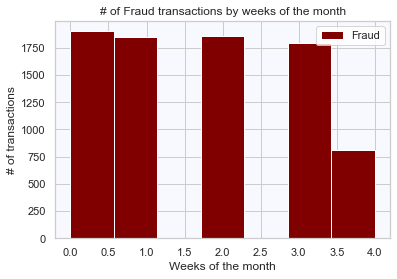

In [45]:
df[(df.isFraud == 1)]['step_week'].plot.hist(bins=7,color='Maroon',label='Fraud').set_facecolor("ghostwhite")
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by weeks of the month")
plt.legend()
plt.show()